In [1]:
import pandas as pd
import numpy as np

In [2]:
from classes.vqa_model_predictor import VqaModelPredictor, DefaultVqaModelPredictor
from common.DAL import get_models_data_frame, get_model
from common.DAL import ModelScore
from common import DAL

from evaluate.VqaMedEvaluatorBase import VqaMedEvaluatorBase
from common.functions import get_highlighted_function_code
import vqa_logger 


Using TensorFlow backend.


In [3]:
from keras import backend as keras_backend
keras_backend.clear_session()

In [4]:
df_models = get_models_data_frame()
try:
    df_show = df_models.sort_values(by=['wbss', 'bleu'], ascending=False).head()
except KeyError: #if no scode yet
    df_show = df_models
    df_show['wbss'] = np.nan
    df_show['bleu'] = np.nan

    
df_show.tail()

,bleu,model_id,wbss,models,val_accuracy,precsision,class_strategy,id,precsision_val,parameter_count,...,f1_score,image_base_net,notes,f1_score_val,loss,recall,val_loss,recall_val,accuracy,model_scores
4,0.500328,5.0,0.492218,"Model(id=5,\n\tmodel_location=C:\Users\Public\...",0.5250,0.155601,answers,5,0.0025,20153852,...,NaN,vgg19,post_concat_dense_units: 8;\nOptimizer: RMSpro...,None,-0.444728,0.052583,-0.551524,NaN,0.415071,"[ModelScore(model_id=5, bleu=0.500327796417358..."
10,0.492549,11.0,0.487867,"Model(id=11,\n\tmodel_location=C:\Users\Public...",0.5095,0.146905,answers,11,0.0130,20153852,...,NaN,vgg19,post_concat_dense_units: 8;\nOptimizer: Adam\n...,None,-0.439734,0.049318,-0.548146,NaN,0.407705,"[ModelScore(model_id=11, bleu=0.49254873984395..."
13,0.489031,14.0,0.483364,"Model(id=14,\n\tmodel_location=C:\Users\Public...",0.5120,0.157314,answers,14,0.0145,20153852,...,NaN,vgg19,post_concat_dense_units: 32;\nOptimizer: Adam\...,None,-0.443905,0.053854,-0.548455,NaN,0.410856,"[ModelScore(model_id=14, bleu=0.48903126651995..."
11,0.482111,12.0,0.478576,"Model(id=12,\n\tmodel_location=C:\Users\Public...",0.5090,0.158612,answers,12,0.0030,20153852,...,NaN,vgg19,post_concat_dense_units: 32;\nOptimizer: RMSpr...,None,-0.442488,0.058549,-0.546081,NaN,0.419154,"[ModelScore(model_id=12, bleu=0.48211126282634..."
3,0.448923,4.0,0.448564,"Model(id=4,\n\tmodel_location=C:\Users\Public\...",0.4600,0.221935,answers,4,0.2305,20153852,...,NaN,vgg19,First model with Answers as labels\n\nmodel_lo...,None,-0.446679,0.646282,-0.482220,0.645632,0.418025,"[ModelScore(model_id=4, bleu=0.448922947892968..."


In [5]:
import logging
import  vqa_logger 
logger = logging.getLogger(__name__)
import IPython


In [6]:
model_id = 5#int(model_id)
mp = DefaultVqaModelPredictor(model_id)
mp

[2019-03-15 09:30:51][classes.vqa_model_predictor][DEBUG] Getting model #5 (post_concat_dense_units: 8;
Optimizer: RMSprop
loss: cosine_proximity
activation: sigmoid
prediction vector: answers
lstm_units: 0
batch_size: 64

model_location = 'C:\Users\Public\Documents\Data\2019\models\20190223_2239_45\vqa_model.h5')
[2019-03-15 09:30:54][common.utils][DEBUG] Loading Model: 0:00:03.414852
[2019-03-15 09:30:54][data_access.api][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-03-15 09:30:54][data_access.api][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-03-15 09:30:54][common.utils][DEBUG] Loading parquet: 0:00:00.000047
[2019-03-15 09:30:54][classes.vqa_model_predictor][WARNING] No data found for test set
[2019-03-15 09:30:54][data_access.api][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data

In [7]:
mp.df_validation.head(2)

,image_name,question,answer,path,processed_question,processed_answer,diagnosis,question_category,answer_embedding,question_embedding,group
12792,synpic54733.jpg,what imaging modality was used to take this im...,ct with iv contrast,C:\Users\Public\Documents\Data\2019\validation...,imaging modality used take image?,ct iv contrast,,Modality,"[0.9566164016723633, 1.1977665424346924, 0.992...","[-0.38250797986984253, 2.5355920791625977, -1....",validation
12793,synpic25647.jpg,what kind of scan is this?,xr - plain film,C:\Users\Public\Documents\Data\2019\validation...,kind scan this?,xr - plain film,,Modality,"[2.1364431381225586, 0.8484694957733154, -0.96...","[-0.01856657862663269, 0.7099074125289917, -1....",validation


In [8]:
code = get_highlighted_function_code(mp.predict,remove_comments=False)
IPython.display.display(code)

In [9]:
df_data = mp.df_validation

from common.settings import data_access
df_data = data_access.load_processed_data(group='train')

[2019-03-15 09:30:57][data_access.api][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-03-15 09:30:57][data_access.api][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-03-15 09:30:59][common.utils][DEBUG] Loading parquet: 0:00:02.449358
[2019-03-15 09:30:59][common.utils][DEBUG] Converting to pandas: 0:00:00.018910


In [10]:
df_predictions = mp.predict(mp.df_validation)
df_predictions.head()

[2019-03-15 09:31:31][common.utils][DEBUG] Raw model prediction: 0:00:27.602257


,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12792,ct with iv contrast,synpic54733.jpg,what imaging modality was used to take this im...,ct iv contrast,[(0.014)],C:\Users\Public\Documents\Data\2019\validation...
12793,xr - plain film,synpic25647.jpg,what kind of scan is this?,xr - plain film,[(0.250)],C:\Users\Public\Documents\Data\2019\validation...
12794,no,synpic35681.jpg,was the mri taken with contrast?,yes,[(0.457)],C:\Users\Public\Documents\Data\2019\validation...
12795,t2,synpic39641.jpg,"is this a t1 weighted, t2 weighted, or flair i...",t2,[(0.001)],C:\Users\Public\Documents\Data\2019\validation...
12796,yes,synpic35693.jpg,is this a noncontrast mri?,yes,[(0.165)],C:\Users\Public\Documents\Data\2019\validation...


In [11]:
df_predictions.describe()

,answer,image_name,question,prediction,probabilities,path
count,2000,2000,2000,2000,2000,2000
unique,470,500,186,33,449,500
top,axial,synpic23560.jpg,what abnormality is seen in the image?,axial,[(0.012)],C:\Users\Public\Documents\Data\2019\validation...
freq,213,4,133,303,34,4


#### Take a look at results for a single image:

In [12]:

image_name = df_predictions.image_name.sample(1).values[0]

df_image = df_predictions[df_predictions.image_name == image_name]
# print(f'Result: {set(df_image.prediction)}')

image_path = df_image.path.values[0]

def get_row_evaluation(row, metric):
    return VqaMedEvaluatorBase.get_all_evaluation(predictions=[row.prediction], ground_truth=[row.answer])[metric]

sorted_cols = sorted(df_image.columns, key=lambda s: s not  in ['answer', 'prediction'])
df_image = df_image[sorted_cols]

df_image['wbss'] = df_image.apply(lambda row: get_row_evaluation(row, 'wbss'), axis=1)
df_image['bleu'] = df_image.apply(lambda row: get_row_evaluation(row, 'bleu'), axis=1)
df_image

,answer,prediction,image_name,question,probabilities,path,wbss,bleu
index,,,,,,,,
12793,xr - plain film,xr - plain film,synpic25647.jpg,what kind of scan is this?,[(0.250)],C:\Users\Public\Documents\Data\2019\validation...,1.000000,1.0
13293,ap,pa,synpic25647.jpg,what plane is this x-ray in?,[(0.091)],C:\Users\Public\Documents\Data\2019\validation...,0.000000,0.0
13793,"lung, mediastinum, pleura",musculoskeletal,synpic25647.jpg,what organ system is being imaged?,[(0.028)],C:\Users\Public\Documents\Data\2019\validation...,0.000000,0.0
14293,no,yes,synpic25647.jpg,is there an abnormality in the x-ray?,[(0.069)],C:\Users\Public\Documents\Data\2019\validation...,0.047033,0.0


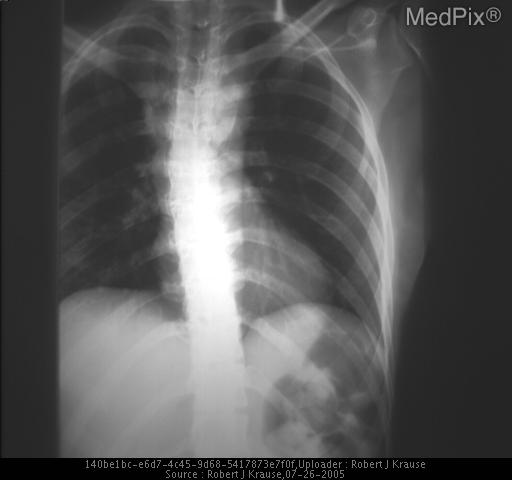

In [14]:
from IPython.display import Image, HTML, display_html
image = Image(filename = image_path, width=400, height=400)
image

## Evaluating the Model

In [15]:
validation_prediction = df_predictions
predictions = validation_prediction.prediction.values
ground_truth = validation_prediction.answer.values
results = VqaMedEvaluatorBase.get_all_evaluation(predictions=predictions, ground_truth=ground_truth)
print(f'Got results of\n{results}')

Got results of
{'bleu': 0.500327796417358, 'wbss': 0.4922177011846115}


In [15]:
model_db_id = mp.model_idx_in_db
assert model_db_id >= 0 
model_db_id

5

In [16]:
bleu = results['bleu']
wbss = results['wbss']
model_score = ModelScore(model_db_id, bleu=bleu, wbss=wbss)
model_score

ModelScore(model_id=5, bleu=0.500327796417358, wbss=0.4922177011846115)

##### Add the score to DB:

In [18]:
# DAL.insert_dal(model_score)